In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# размеченный файл

df = pd.read_excel('constructions.xlsx', sheet_name=0)
df.head(2)

,sentence,original,corrected,Gov_Constr,Extra_Miss_Subst,Fusion_Transfer,level,before,constr_original,constr_corrected,constr,calque,author,genre,gender,course,text_type,words,sentences,language
0,Я буду в июле весь месяц.,в июле весь месяц,"весь июль месяц,",Constr,Extra,Transfer,B1,"c фр. ""j'y serai tout le mois en juillet""",?,?,?,1,Sophia (native bulgare),answers,ж,NaN,NaN,153,18,FL
1,"Официальный язык России - русский, он принадле...",принадлежит группе,принадлежит к группе,Gov,Miss,-,C1,D / к D; Verb,D,к D,Verb,0,Danuta (native slavic),description,ж,NaN,NaN,165,20,FL


In [3]:
df = df[['Extra_Miss_Subst', 'sentence', 'original', 'corrected', 'Gov_Constr', 'Fusion_Transfer', 'level', 'before',
       'constr_original', 'constr_corrected', 'constr', 'calque', 'author',
       'genre', 'gender', 'course', 'text_type', 'words', 'sentences', 'language']]

In [4]:
# удаляем ненужные столбцы

df = df.drop(['sentence', 'original', 'corrected', 'before', 'author', 'course', 'text_type', 'genre', 'calque', 'words', 'sentences'], axis=1)
df.head(3)

,Extra_Miss_Subst,Gov_Constr,Fusion_Transfer,level,constr_original,constr_corrected,constr,gender,language
0,Extra,Constr,Transfer,B1,?,?,?,ж,FL
1,Miss,Gov,-,C1,D,к D,Verb,ж,FL
2,Miss,Gov,Transfer,B1,N,по D,Verb,ж,FL


In [5]:
columns = df.columns.values

In [6]:
# подправляем данные: убираем пробелы

for col in columns:
    df[col] = df[col].str.strip()

In [7]:
df['Gov_Constr'].value_counts()

Gov       401
Constr    246
Name: Gov_Constr, dtype: int64

In [8]:
# делим столбцы constr_origianl и constr_corrected на столбцы с предлогом и стобцы с падежом

prep_orig = []
case_orig = []
prep_corr = []
case_corr = []


orig = df['constr_original'].tolist()
corr = df['constr_corrected'].tolist()

for el in orig:
    prep = re.findall('[а-я- ]', el)
    prep = ''.join(prep).strip()
    prep = '-' if prep == '' else prep
    prep_orig.append(prep)
    el = el.replace(prep, '')
    case = re.findall('[A-Za-z ]', el)
    case = ''.join(case).strip()
    case = '-' if case == '' else case
    case_orig.append(case)
        
for el in corr:
    prep = re.findall('[а-я- ]', el)
    prep = ''.join(prep).strip()
    prep = '-' if prep == '' else prep
    prep_corr.append(prep)
    el = el.replace(prep, '')
    case = re.findall('[A-Za-z ]', el)
    case = ''.join(case).strip()
    case = '-' if case == '' else case
    case_corr.append(case)

df['prep_orig'] = prep_orig
df['case_orig'] = case_orig
df['prep_corr'] = prep_corr
df['case_corr'] = case_corr

In [9]:
# удаляем ненужные строки:  значения '-' в стобце 'Extra_Miss_Subst', '?' в остальных

df = df[df['Extra_Miss_Subst'] != '-']
df = df[df.constr.str.contains('\?') == False]
df = df.replace({'?': np.nan}).dropna()
df = df.reset_index(drop=True)
df.head(3)

,Extra_Miss_Subst,Gov_Constr,Fusion_Transfer,level,constr_original,constr_corrected,constr,gender,language,prep_orig,case_orig,prep_corr,case_corr
0,Miss,Gov,-,C1,D,к D,Verb,ж,FL,-,D,к,D
1,Miss,Gov,Transfer,B1,N,по D,Verb,ж,FL,-,N,по,D
2,Miss,Constr,-,B2,N,в L,place,ж,FL,-,N,в,L


In [10]:
len(df)

456

In [11]:
#

for col in ['prep_orig', 'case_orig', 'prep_corr', 'case_corr']:
    print(df[col].value_counts(), '\n')

-               185
на               83
в                46
для              29
о                18
с                17
за               14
из               11
по               11
от                8
к                 8
во время          7
после             4
в течение         3
из-за             3
около             2
у                 2
а                 1
над               1
о чем угодно      1
до                1
через             1
Name: prep_orig, dtype: int64 

L         121
N          85
G          74
A          62
D          26
Adv        24
I          21
V          17
-          13
c I         4
A anim      4
c G         3
o L         1
ADV         1
Name: case_orig, dtype: int64 

в                     131
-                     104
на                     66
по                     34
о                      25
за                     16
от                     11
с                      11
из                     10
к                      10
для                     7
у             

In [12]:
# подправляем данные

df.loc[df.prep_orig == 'а', 'prep_orig'] = 'на'
df.loc[df.case_corr == 'onj V', 'case_corr'] = 'Conj V'
df.loc[df.case_corr == 'c I', 'prep_corr'] = 'с'
df.case_corr = df.case_corr.str.replace('c I', 'I')
df.loc[df.case_orig == 'c I', 'prep_orig'] = 'с'
df.case_orig = df.case_orig.str.replace('c I', 'I')
df.loc[df.case_orig == 'c G', 'prep_orig'] = 'с'
df.case_orig = df.case_orig.str.replace('c G', 'G')
df.loc[df.case_orig == 'o L', 'prep_orig'] = 'о'
df.case_orig = df.case_orig.str.replace('o L', 'L')

In [13]:
df = df.drop(['constr_original', 'constr_corrected'], axis=1)
df = df.replace({'?': np.nan}).dropna()
df = df.reset_index(drop=True)

In [14]:
# удаляем строки, где нет падежа

df = df[df['case_corr'] != '-']
df = df[df['case_orig'] != '-']
df = df[df['constr'] != 'Verb или Noun']
df = df.reset_index(drop=True)

In [15]:
columns = df.columns.values

for col in columns:
    print(df[col].value_counts(), '\n')

Subst    187
Miss     176
Extra     78
Name: Extra_Miss_Subst, dtype: int64 

Gov       292
Constr    149
Name: Gov_Constr, dtype: int64 

-           336
Transfer     76
Fusion       29
Name: Fusion_Transfer, dtype: int64 

A2    200
A1     80
B1     79
C1     54
B2     17
C2     11
Name: level, dtype: int64 

Verb       208
time        95
Noun        80
place       33
purpose     17
Adj          4
cause        3
Adv          1
Name: constr, dtype: int64 

ж    343
м     98
Name: gender, dtype: int64 

FL    385
HL     56
Name: language, dtype: int64 

-            177
на            81
в             45
для           25
с             24
о             19
за            14
из            11
по            11
от             8
к              8
во время       5
в течение      3
из-за          3
около          2
у              2
над            1
после          1
до             1
Name: prep_orig, dtype: int64 

L         122
N          84
G          77
A          61
D          26
I          25
A

### Сохраняем csv

In [36]:
# датафрейм без колонок с предлогами

data = df[['Gov_Constr', 'Extra_Miss_Subst', 'Fusion_Transfer', 'level', 
           'constr', 'gender', 'language', 'case_orig', 'case_corr']]

In [650]:
# сохраняем в csv

data.to_csv('extra_miss_subst_with_prep.csv', sep='\t', encoding='utf-8')

In [37]:
data.head()

,Gov_Constr,Extra_Miss_Subst,Fusion_Transfer,level,constr,gender,language,case_orig,case_corr
0,Gov,Miss,-,C1,Verb,ж,FL,D,D
1,Gov,Miss,Transfer,B1,Verb,ж,FL,N,D
2,Constr,Miss,-,B2,place,ж,FL,N,L
3,Gov,Miss,-,A2,Verb,ж,FL,N,I
4,Gov,Subst,-,A1,Noun,ж,FL,L,L


In [626]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

columns = data.columns.values

for i in columns:
    df_labeled = label_encoder.fit_transform(data[i])
    data[i] = df_labeled

E:\programs\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [634]:
data.to_csv('extra_miss_subst_label_enc.csv', sep='\t', encoding='utf-8')

In [556]:
# extra subst with prep


data = df[['Gov_Constr', 'Extra_Miss_Subst', 'Fusion_Transfer', 'level', 
           'constr', 'gender', 'language', 'prep_orig', 'case_orig', 'case_corr']]
data = data[data['Extra_Miss_Subst'] != 'Miss']

data.to_csv('extra_subst.csv', sep='\t', encoding='utf-8')

In [554]:
# miss subst with prep


data = df[['Gov_Constr', 'Extra_Miss_Subst', 'Fusion_Transfer', 'level', 
           'constr', 'gender', 'language', 'prep_corr', 'case_orig', 'case_corr']]
data = data[data['Extra_Miss_Subst'] != 'Extra']

data.to_csv('miss_subst.csv', sep='\t', encoding='utf-8')

In [592]:
# miss

df['miss'] = df['Extra_Miss_Subst'].map({'Miss': 'miss', 'Extra': 'not miss', 'Subst': 'not miss'})
data = df[['Gov_Constr', 'miss', 'Fusion_Transfer', 'level', 
           'constr', 'gender', 'language', 'case_orig', 'case_corr']]

In [594]:
# сохраняем в csv

data.to_csv('miss.csv', sep='\t', encoding='utf-8')

In [595]:
# subst

df['subst'] = df['Extra_Miss_Subst'].map({'Miss': 'not subst', 'Extra': 'not subst', 'Subst': 'subst'})
data = df[['Gov_Constr', 'subst', 'Fusion_Transfer', 'level', 
           'constr', 'gender', 'language', 'case_orig', 'case_corr']]

In [597]:
data.to_csv('subst.csv', sep='\t', encoding='utf-8')

## Графики

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import SVG
import seaborn as sns

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


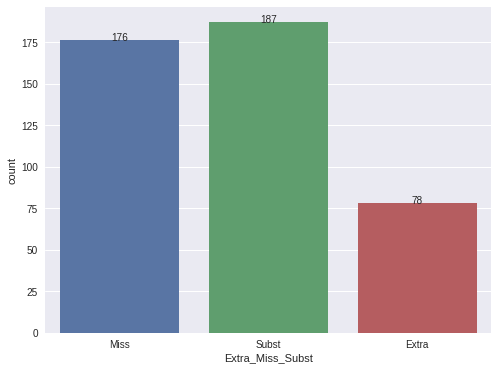

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df)

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


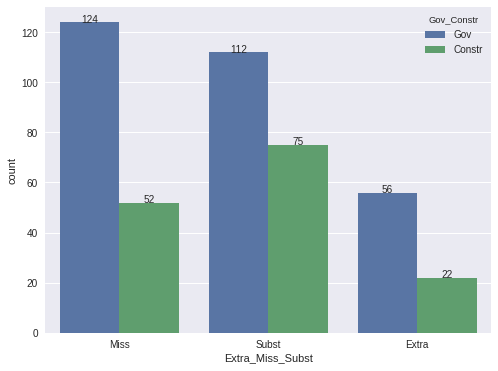

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="Gov_Constr")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


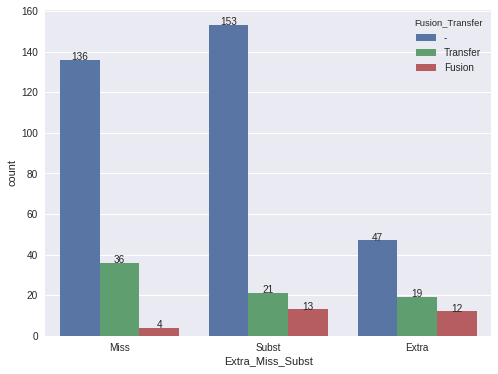

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="Fusion_Transfer")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ValueError: cannot convert float NaN to integer

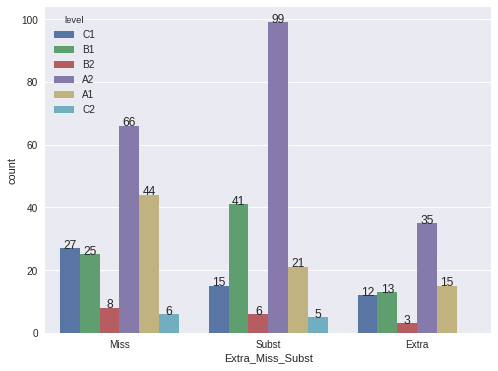

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="level")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


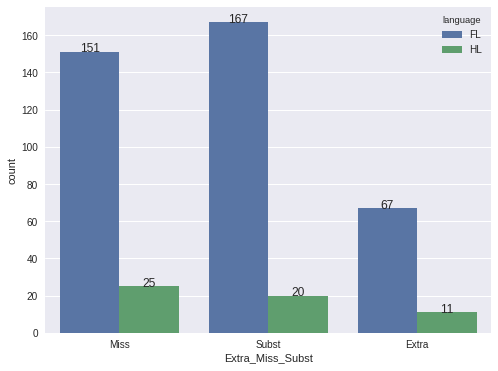

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="language")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


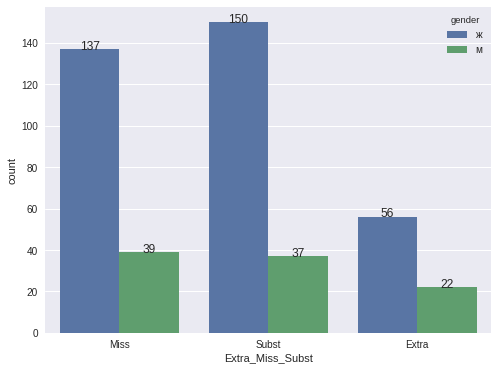

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="gender")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ValueError: cannot convert float NaN to integer

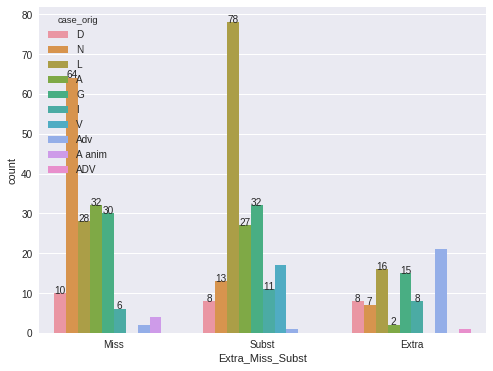

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="case_orig")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ValueError: cannot convert float NaN to integer

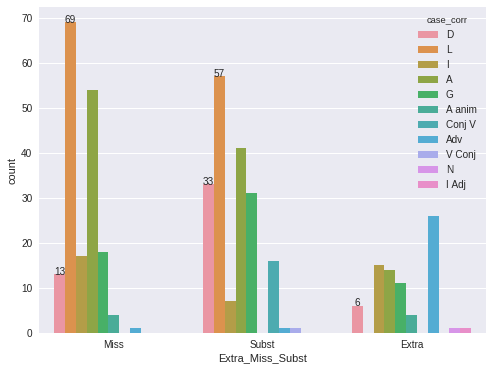

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="case_corr")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ValueError: cannot convert float NaN to integer

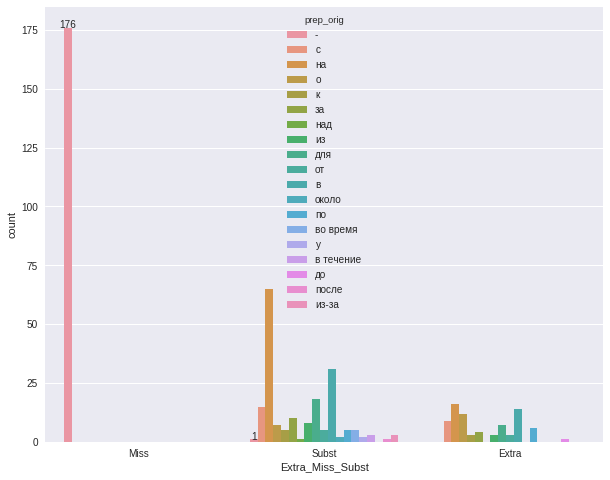

In [49]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="prep_orig")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ValueError: cannot convert float NaN to integer

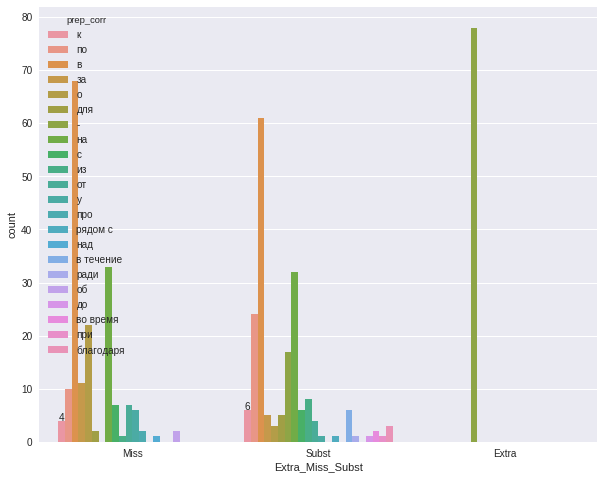

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="prep_corr")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')

/home/katya/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ValueError: cannot convert float NaN to integer

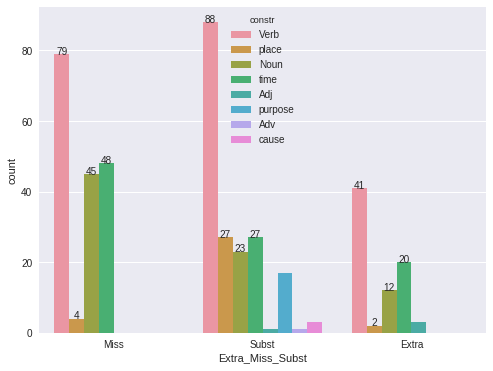

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Extra_Miss_Subst", data=df, hue="constr")

for p in ax.patches: 
    ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center')